# 1.0 Import Libraries

Import Relevant Libraries like Yfinance to download stock data, pandas to visualize dataframes and manipulate them, matplotplib to plot some distributions and values, and scipy stats to hel us to calculate the normal distribution faster and numpy to log things

In [149]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# 2.0 Download Stock Data

Using the Yahoo Finance Library to downlaod stock data and calculate the returns in a new column

In [150]:
df=yf.download("AAPL",start="2021-01-01",progress=False)
df["Returns"]=df["Adj Close"].pct_change()
df

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.617111,143301900,NaN
2021-01-05,128.889999,131.740005,128.429993,131.009995,130.207306,97664900,0.012364
2021-01-06,127.720001,131.050003,126.379997,126.599998,125.824318,155088000,-0.033662
2021-01-07,128.360001,131.630005,127.860001,130.919998,130.117859,109578200,0.034123
2021-01-08,132.429993,132.630005,130.229996,132.050003,131.240936,105158200,0.008631
...,...,...,...,...,...,...,...
2021-12-13,181.119995,182.130005,175.529999,175.740005,175.740005,153237000,-0.020674
2021-12-14,175.250000,177.740005,172.210007,174.330002,174.330002,139380400,-0.008023
2021-12-15,175.110001,179.500000,172.309998,179.300003,179.300003,131063300,0.028509


# 3.0 Sort & Rank Returns

Sort the Value by the minimum return to the maximum return and add a column with the Ranks

In [151]:
df=df.sort_values(by=['Returns'])
df=df.reset_index() # Rank 
df.index=df.index+1
df=df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
1,2021-03-08,120.930000,121.000000,116.209999,116.360001,115.819870,154376600,-0.041674
2,2021-12-16,179.279999,181.139999,170.750000,172.259995,172.259995,150185800,-0.039264
3,2021-01-29,135.830002,136.740005,130.210007,131.960007,131.151489,177523800,-0.037421
4,2021-05-04,131.190002,131.490005,126.699997,127.849998,127.256538,137564700,-0.035385
5,2021-01-28,139.520004,141.990005,136.699997,137.089996,136.250046,142621100,-0.034985
...,...,...,...,...,...,...,...,...
238,2021-01-07,128.360001,131.630005,127.860001,130.919998,130.117859,109578200,0.034123
239,2021-12-07,169.080002,171.580002,168.339996,171.179993,171.179993,120405400,0.035446
240,2021-01-21,133.800003,139.669998,133.589996,136.869995,136.031387,120150900,0.036658
241,2021-03-09,119.029999,122.059998,118.790001,121.089996,120.527916,129525800,0.040650


# 4.0 Mean & Std of Returns

Calculating Mean, Standard Deviation and number of observations in our dataframe

In [152]:
mean=df["Returns"].mean()
std=df["Returns"].std()
number_observations=len(df["Adj Close"])
print(f"Mean: {(mean*100):.4f}% ")
print(f"Standard Deviation: {(std*100):.4f}% ")
print(f"Number of Observations: {number_observations}")

Mean: 0.1307% 
Standard Deviation: 1.5893% 
Number of Observations: 242


# 5.0 Empirical Distribution

Ploting what is the expected formation of the distribution to be consider normally distributed

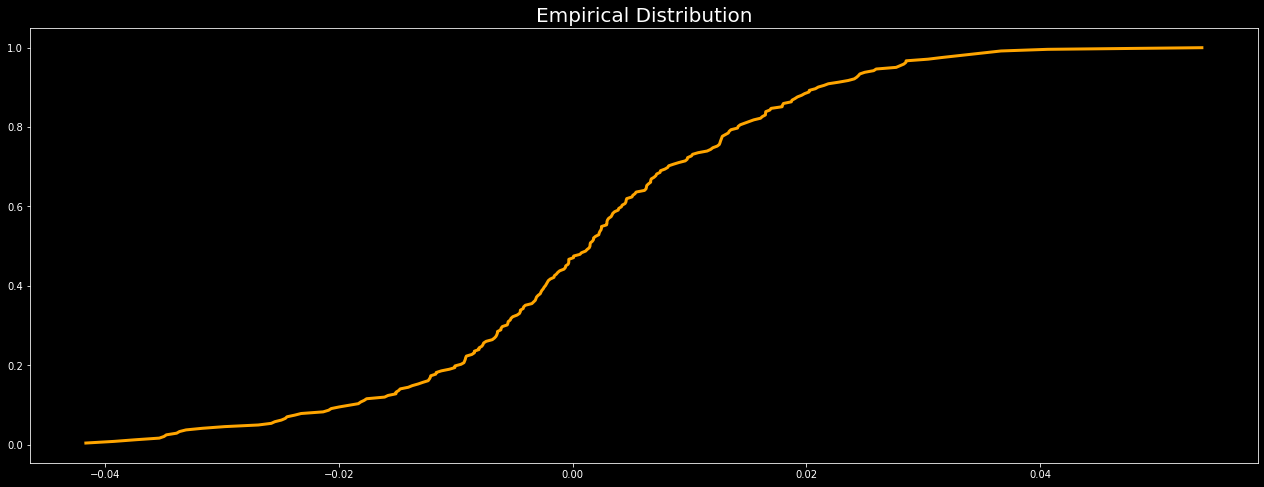

In [153]:
plt.style.use("dark_background")
plt.figure(figsize=(22,8))
plt.title("Empirical Distribution",fontsize=20)
df["Empirical_Distribution"]=df.index/number_observations
plt.plot(df["Returns"],df["Empirical_Distribution"],color="Orange",linewidth=3)

# 6.0 Real Distribution

Ploting what is the Real formation of the distribution 

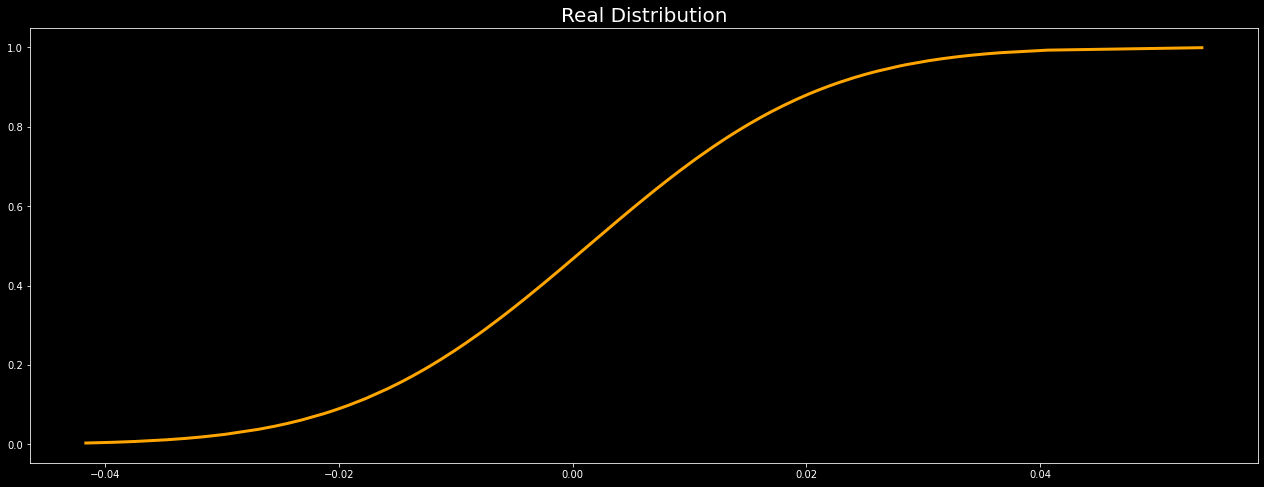

In [154]:
df["Real_Distribution"]=norm.cdf(df["Returns"],mean,std) # Cumulative Normal Distribution
plt.style.use("dark_background")
plt.figure(figsize=(22,8))
plt.title("Real Distribution",fontsize=20)
plt.plot(df["Returns"],df["Real_Distribution"],color="orange",linewidth=3)

# 7.0 Plot Real & Empirical Distributions

Comparing the real distribution find by the values downloaded by the empirical distribution calculated by the "expected" curve formation following the Normal Distribution

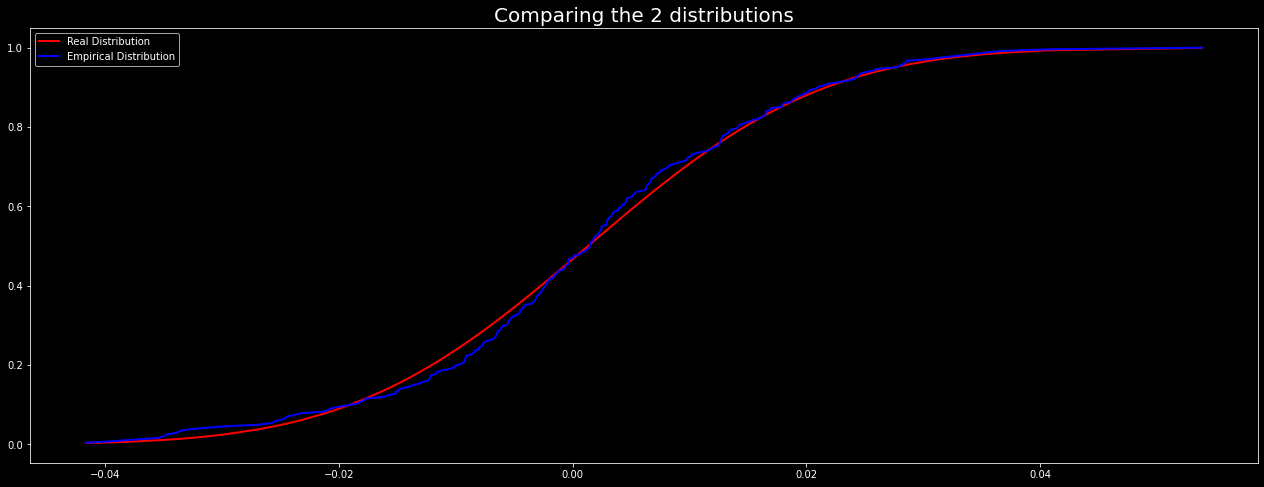

In [155]:
plt.figure(figsize=(22,8))
plt.title("Comparing the 2 distributions",fontsize=20)
plt.plot(df["Returns"],df["Real_Distribution"],color="red",linewidth=2,label="Real Distribution")
plt.plot(df["Returns"],df["Empirical_Distribution"],color="blue",linewidth=2,label="Empirical Distribution")
plt.legend()

# 8.0 Differences between Empirical & Real Distribution

Calculating the absolute differences between empirical and real distribution

In [156]:
df["Difference"]=abs(df["Empirical_Distribution"]-df["Real_Distribution"])
df

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Empirical_Distribution,Real_Distribution,Difference
1,2021-03-08,120.930000,121.000000,116.209999,116.360001,115.819870,154376600,-0.041674,0.004132,0.003421,0.000711
2,2021-12-16,179.279999,181.139999,170.750000,172.259995,172.259995,150185800,-0.039264,0.008264,0.005343,0.002921
3,2021-01-29,135.830002,136.740005,130.210007,131.960007,131.151489,177523800,-0.037421,0.012397,0.007409,0.004988
4,2021-05-04,131.190002,131.490005,126.699997,127.849998,127.256538,137564700,-0.035385,0.016529,0.010479,0.006050
5,2021-01-28,139.520004,141.990005,136.699997,137.089996,136.250046,142621100,-0.034985,0.020661,0.011198,0.009463
...,...,...,...,...,...,...,...,...,...,...,...
238,2021-01-07,128.360001,131.630005,127.860001,130.919998,130.117859,109578200,0.034123,0.983471,0.980533,0.002938
239,2021-12-07,169.080002,171.580002,168.339996,171.179993,171.179993,120405400,0.035446,0.987603,0.984149,0.003455
240,2021-01-21,133.800003,139.669998,133.589996,136.869995,136.031387,120150900,0.036658,0.991736,0.986939,0.004796
241,2021-03-09,119.029999,122.059998,118.790001,121.089996,120.527916,129525800,0.040650,0.995868,0.993348,0.002519


# 9.0 Supremum

Supremum is the max absolute difference between the real and the empirical distributions

In [157]:
supremum=max(df["Difference"])
print(f"Supremum: {supremum*100:.4f}%")

Supremum: 4.5409%


# 10.0 Kolmogorov-Smirnov Statistic

Using the Kolmogorov-Smirnov Statistic too find the observed value

In [158]:
observed_value=supremum*np.sqrt((number_observations))
observed_value

0.7064012391998696

# 11.0 Results Analysis

The confidence used in the test is 1%, se I want to test if the observed value finded above is significant to prove that my distribution is normal or not

In [159]:
confidence=0.01
critical_value=np.sqrt(-np.log(confidence/2)*0.5)
critical_value

1.6276236307187293

In [160]:
if observed_value>critical_value:
    print("Not Normally Distributed")
if observed_value<=critical_value:
    print("Normally Distributed!")
p_value=np.exp(-supremum**2*number_observations)
print(f"P-Value: {p_value:.7f}")

Normally Distributed!
P-Value: 0.6071358
